In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import array

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
import yfinance as yf

stock = yf.Ticker("META")
hist = stock.history(period="8y")
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-15 00:00:00-04:00,90.000000,90.989998,89.419998,89.760002,30886600,0.0,0.0
2015-07-16 00:00:00-04:00,90.279999,90.860001,89.769997,90.849998,21804100,0.0,0.0
2015-07-17 00:00:00-04:00,92.550003,95.389999,92.540001,94.970001,54001600,0.0,0.0
2015-07-20 00:00:00-04:00,95.849998,98.599998,95.360001,97.910004,54860500,0.0,0.0
2015-07-21 00:00:00-04:00,98.949997,99.239998,97.139999,98.389999,39453300,0.0,0.0
2015-07-22 00:00:00-04:00,96.739998,97.580002,95.919998,97.040001,28299500,0.0,0.0
2015-07-23 00:00:00-04:00,96.959999,97.449997,94.809998,95.440002,29418800,0.0,0.0
2015-07-24 00:00:00-04:00,97.349998,97.760002,95.879997,96.949997,33444900,0.0,0.0
2015-07-27 00:00:00-04:00,96.580002,96.610001,93.830002,94.169998,38585400,0.0,0.0


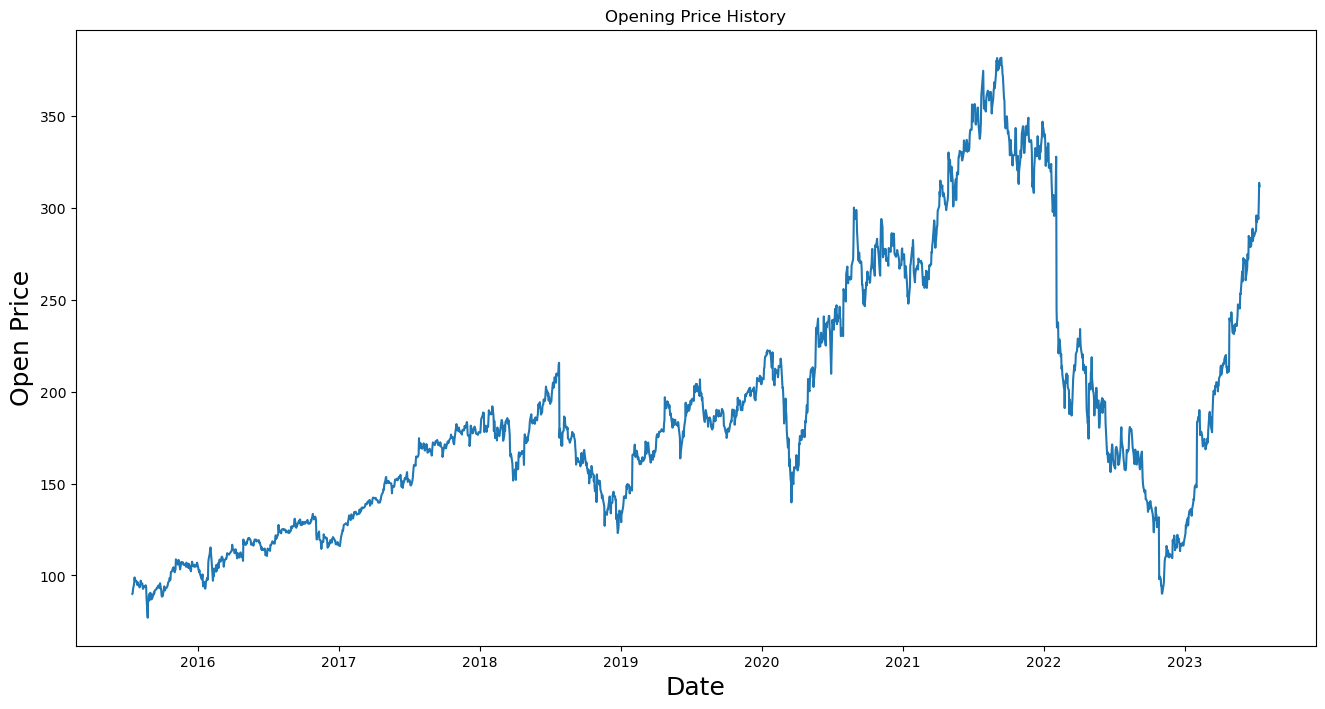

In [5]:
# Visualize the opening price history

plt.figure(figsize = (16, 8))
plt.title('Opening Price History')
plt.plot(hist['Open'] , label='Meta Open price')

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('Open Price' , fontsize = '18')

plt.show()

In [6]:
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set = df.iloc[:n, 1:2].values
test_set = df.iloc[n:, 1:2].values

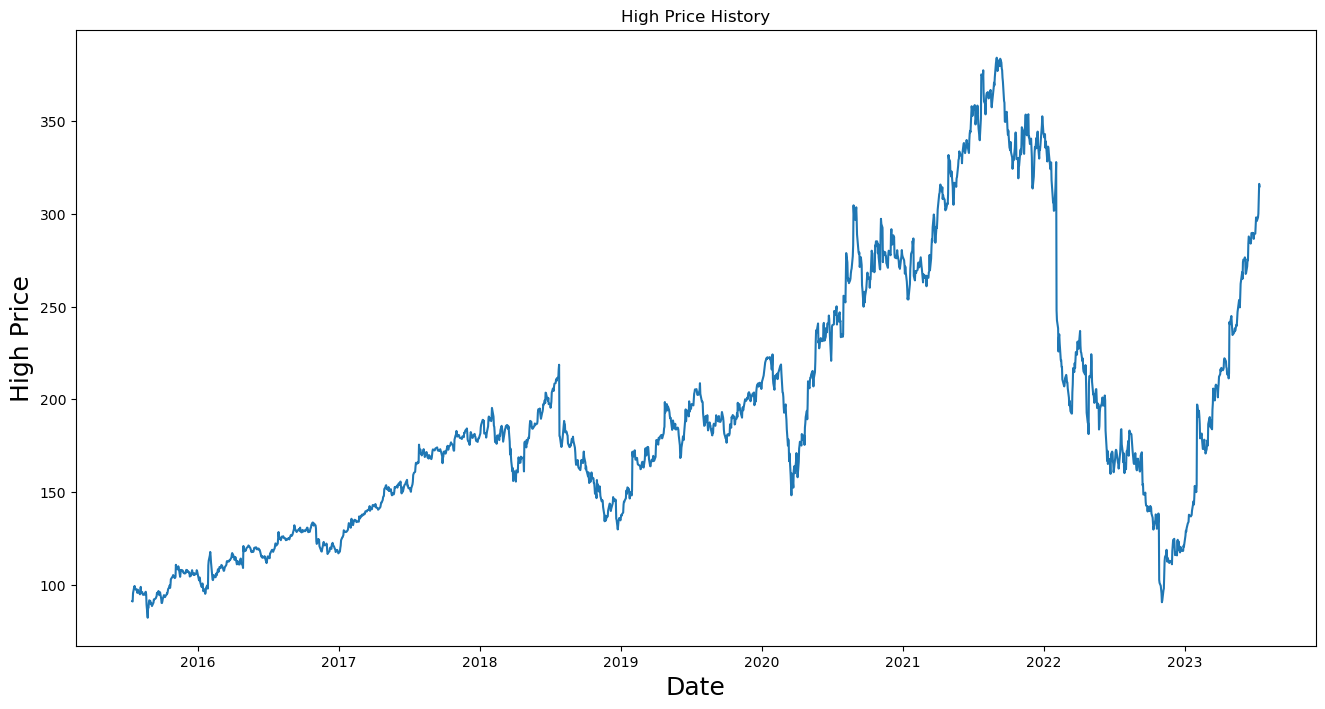

In [7]:
# Visualize the close price history

plt.figure(figsize = (16, 8))
plt.title('High Price History')
plt.plot(hist['High'],label='Meta High price')

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('High Price' , fontsize = '18')

plt.show()

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            30200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
#Epochs

# model.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
50/50 [==============================] - 25s 83ms/step - loss: 0.0217
Epoch 2/60
50/50 [==============================] - 3s 58ms/step - loss: 0.0048
Epoch 3/60
50/50 [==============================] - 4s 76ms/step - loss: 0.0049
Epoch 4/60
50/50 [==============================] - 4s 81ms/step - loss: 0.0043
Epoch 5/60
50/50 [==============================] - 4s 82ms/step - loss: 0.0043
Epoch 6/60
50/50 [==============================] - 4s 85ms/step - loss: 0.0054
Epoch 7/60
50/50 [==============================] - 4s 75ms/step - loss: 0.0038
Epoch 8/60
50/50 [==============================] - 4s 72ms/step - loss: 0.0045
Epoch 9/60
50/50 [==============================] - 4s 71ms/step - loss: 0.0036
Epoch 10/60
50/50 [==============================] - 4s 75ms/step - loss: 0.0037
Epoch 11/60
50/50 [==============================] - 4s 75ms/step - loss: 0.0035
Epoch 12/60
50/50 [==============================] - 4s 74ms/step - loss: 0.0038
Epoch 13/60
50/50 [=================

In [12]:
#Saving the model

# model.save("final-predict.h5")

In [11]:
#Importing the model

from keras.models import load_model
model_x = load_model('final-predict.h5')

In [12]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [13]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(X_test)

(403, 30, 1)
[[[0.81901805]
  [0.81878643]
  [0.82093701]
  ...
  [0.82189654]
  [0.76928936]
  [0.76647701]]

 [[0.81878643]
  [0.82093701]
  [0.78467447]
  ...
  [0.76928936]
  [0.76647701]
  [0.78748682]]

 [[0.82093701]
  [0.78467447]
  [0.80541954]
  ...
  [0.76647701]
  [0.78748682]
  [0.8087944 ]]

 ...

 [[0.59628112]
  [0.61725782]
  [0.60518134]
  ...
  [0.70841061]
  [0.71479624]
  [0.72157889]]

 [[0.61725782]
  [0.60518134]
  [0.63495901]
  ...
  [0.71479624]
  [0.72157889]
  [0.75224994]]

 [[0.60518134]
  [0.63495901]
  [0.63942567]
  ...
  [0.72157889]
  [0.75224994]
  [0.77471546]]]


In [14]:
predicted_stock_price = model_x.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

13/13 [==============================] - 7s 59ms/step


In [15]:
df['Date']=df.index

In [16]:
df=df.reset_index(drop=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,90.000000,90.989998,89.419998,89.760002,30886600,0.0,0.0,2015-07-15 00:00:00-04:00
1,90.279999,90.860001,89.769997,90.849998,21804100,0.0,0.0,2015-07-16 00:00:00-04:00
2,92.550003,95.389999,92.540001,94.970001,54001600,0.0,0.0,2015-07-17 00:00:00-04:00
3,95.849998,98.599998,95.360001,97.910004,54860500,0.0,0.0,2015-07-20 00:00:00-04:00
4,98.949997,99.239998,97.139999,98.389999,39453300,0.0,0.0,2015-07-21 00:00:00-04:00
...,...,...,...,...,...,...,...,...
2009,295.549988,298.130005,287.049988,294.100006,37058300,0.0,0.0,2023-07-10 00:00:00-04:00
2010,293.899994,300.179993,291.899994,298.290009,27585900,0.0,0.0,2023-07-11 00:00:00-04:00
2011,301.750000,309.450012,300.100006,309.339996,36677100,0.0,0.0,2023-07-12 00:00:00-04:00
2012,313.619995,316.239990,310.290009,313.410004,30281000,0.0,0.0,2023-07-13 00:00:00-04:00


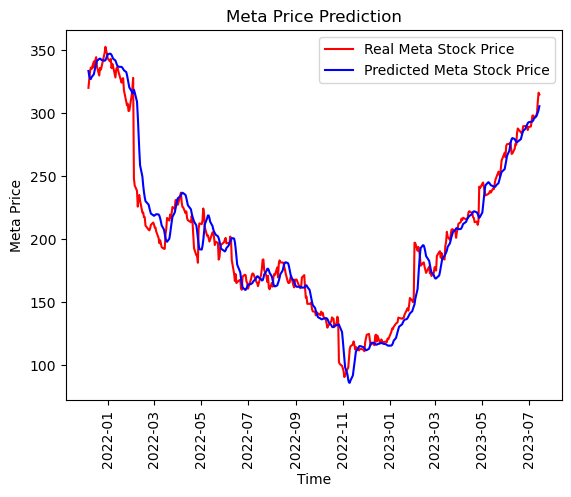

In [17]:
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Meta Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Meta Stock Price')

plt.title('Meta Price Prediction')
plt.xlabel('Time')
plt.ylabel('Meta Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()